# ***ASSIGNMENT - 11***

## **Task 1: Data Preparation**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    classification_report)

# Load the dataset
data = pd.read_excel("heart_disease.xlsx",sheet_name="Heart_disease")

print("\nFirst 5 rows of the dataset:")
print(data.head())

print("\nDataset Information:")
print(data.info())


First 5 rows of the dataset:
   age   sex               cp  ...        slope          thal  num
0   63  Male   typical angina  ...  downsloping  fixed defect    0
1   41  Male  atypical angina  ...         flat  fixed defect    0
2   57  Male     asymptomatic  ...         flat  fixed defect    0
3   52  Male   typical angina  ...         flat  fixed defect    0
4   57  Male     asymptomatic  ...         flat  fixed defect    0

[5 rows x 13 columns]

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null 

## **Task 2: Exploratory Data Analysis**


Missing Values:
age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalch       0
exang        0
oldpeak     62
slope        0
thal         0
num          0
dtype: int64

Target Variable Distribution:
sex
Male      718
Female    190
Name: count, dtype: int64


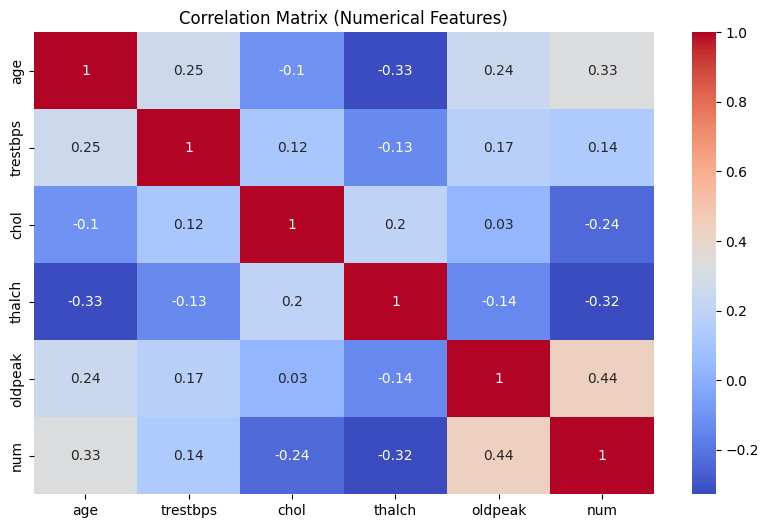

In [2]:
print("\nMissing Values:")
print(data.isnull().sum())

print("\nTarget Variable Distribution:")
print(data.iloc[:,1].value_counts())

# Correlation Matrix (Numerical Features Only)
numeric_data = data.select_dtypes(include=np.number)

plt.figure(figsize=(10, 6))
sns.heatmap(numeric_data.corr(), cmap="coolwarm", annot=True)
plt.title("Correlation Matrix (Numerical Features)")
plt.show()


## **Task 3: Feature Engineering**

In [3]:
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

# 3.2 Encoding Categorical Features

for col in X.select_dtypes(include="object").columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col].astype(str))
print("\nCategorical variables encoded.")

# 3.3 Feature Scaling

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print("Numerical feature scaling completed using StandardScaler.")

# 3.4 Train–Test Split

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y)

print("Train–Test split completed.")


Categorical variables encoded.
Numerical feature scaling completed using StandardScaler.
Train–Test split completed.


## **Task 4: Decision Tree Classification**

In [4]:
# Decision Tree Model
dt_model = DecisionTreeClassifier(
    criterion="gini",
    random_state=42)

# Train model
dt_model.fit(X_train, y_train)

# Predictions
y_pred = dt_model.predict(X_test)

# ------------------------------------------------------------
# Model Evaluation
# ------------------------------------------------------------

print("\nDecision Tree Model Performance:")
print("Accuracy :", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average="macro"))
print("Recall   :", recall_score(y_test, y_pred, average="macro"))
print("F1 Score :", f1_score(y_test, y_pred, average="macro"))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Decision Tree Model Performance:
Accuracy : 0.4725274725274725
Precision: 0.32170540730912245
Recall   : 0.322560851098587
F1 Score : 0.3214809000523286

Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.69      0.71        80
           1       0.45      0.43      0.44        53
           2       0.15      0.18      0.16        22
           3       0.14      0.14      0.14        21
           4       0.14      0.17      0.15         6

    accuracy                           0.47       182
   macro avg       0.32      0.32      0.32       182
weighted avg       0.49      0.47      0.48       182



## **Task 5: Hyperparameter Tuning**

In [5]:
param_grid = {
    "max_depth": [3, 5, 7, 10, None],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "criterion": ["gini", "entropy"]}

grid_search = GridSearchCV(
    estimator=DecisionTreeClassifier(random_state=42),
    param_grid=param_grid,
    scoring="f1_macro",
    cv=5,
    n_jobs=-1)

grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_

print("\nBest Hyperparameters:")
print(grid_search.best_params_)


Best Hyperparameters:
{'criterion': 'gini', 'max_depth': 7, 'min_samples_leaf': 2, 'min_samples_split': 10}


## **Task 6: Model Evaluation and Analysis**


Tuned Decision Tree Performance:
Accuracy : 0.4945054945054945
Precision: 0.3117463617463617
Recall   : 0.312972923303112
F1 Score : 0.30558552359181007


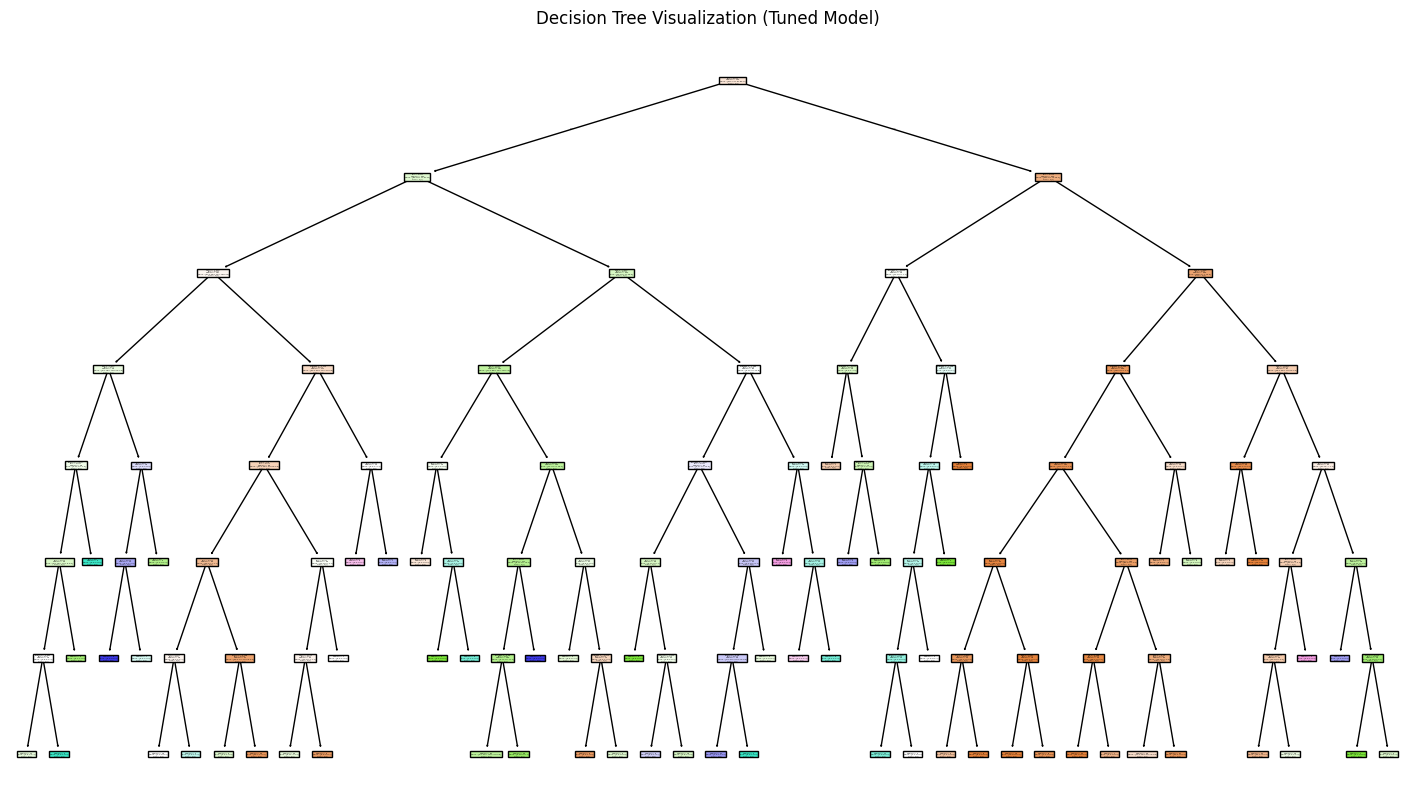

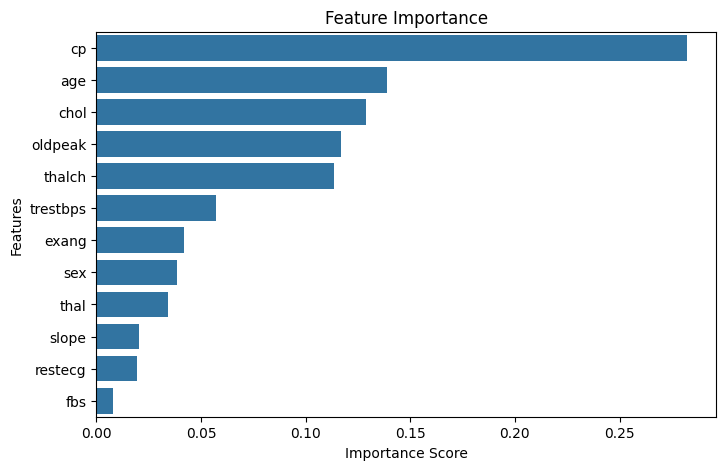

In [6]:
best_pred = best_model.predict(X_test)

print("\nTuned Decision Tree Performance:")
print("Accuracy :", accuracy_score(y_test, best_pred))
print("Precision:", precision_score(y_test, best_pred, average="macro"))
print("Recall   :", recall_score(y_test, best_pred, average="macro"))
print("F1 Score :", f1_score(y_test, best_pred, average="macro"))

# ------------------------------------------------------------
# Visualize Decision Tree Structure
# ------------------------------------------------------------

plt.figure(figsize=(18, 10))
plot_tree(
    best_model,
    feature_names=data.columns[:-1],
    filled=True,
    class_names=True)
plt.title("Decision Tree Visualization (Tuned Model)")
plt.show()

# ------------------------------------------------------------
# Feature Importance
# ------------------------------------------------------------

feature_importance = pd.Series(
    best_model.feature_importances_,
    index=data.columns[:-1]
).sort_values(ascending=False)

plt.figure(figsize=(8, 5))
sns.barplot(x=feature_importance, y=feature_importance.index)
plt.title("Feature Importance")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()

## **Interview Questions**

1.Common hyperparameters of decision tree models:

- max_depth:
  Controls the maximum depth of the tree and prevents overfitting.

- min_samples_split:
  Minimum number of samples required to split an internal node.

- Determines how the quality of a split is measured (gini or entropy).

2.Difference between Label encoding and One-Hot encoding:

Label Encoding:
- Assigns numerical labels to categories
- Can introduce an unintended ordinal relationship

One-Hot Encoding:
- Creates separate binary columns for each category
- Avoids ordinal relationships but increases dimensionality.